## **Урок 4. Визуальный анализ данных**

## Задача 1
- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

1. Скачать следующие данные: kc-house-data

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('kc_house_data.csv', encoding='windows-1251')

2. Изучите стоимости недвижимости

С помощью метода describe изучим основные характеристики распределения стоимости недвижимости:

In [37]:
df['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Построим гистограмму распределения стоимости:

''

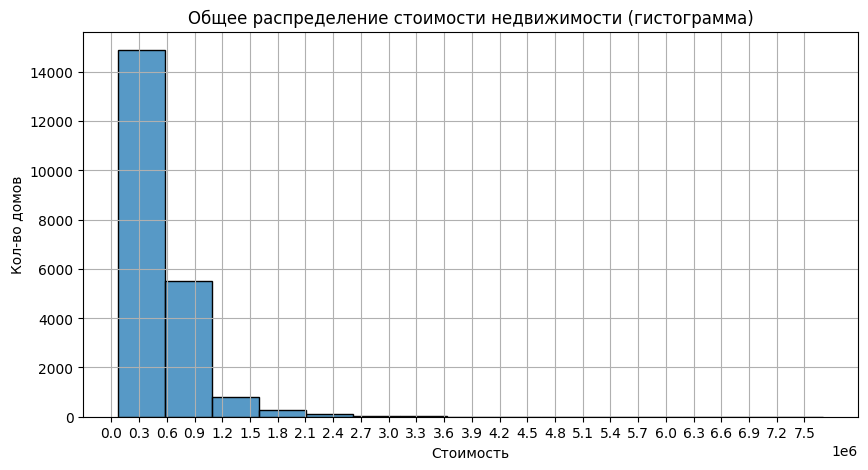

In [38]:
plt.figure(figsize=(10, 5))
sns.histplot(x=df['price'], bins=15)
plt.title('Общее распределение стоимости недвижимости (гистограмма)')
plt.xlabel('Стоимость')
plt.ylabel('Кол-во домов')
plt.xticks(np.arange(0, df['price'].max(), 300_000))
plt.grid()
;

Для анализа "выбросов" построим более детальное распределение с помощью диаграммы "ящик с усами".

''

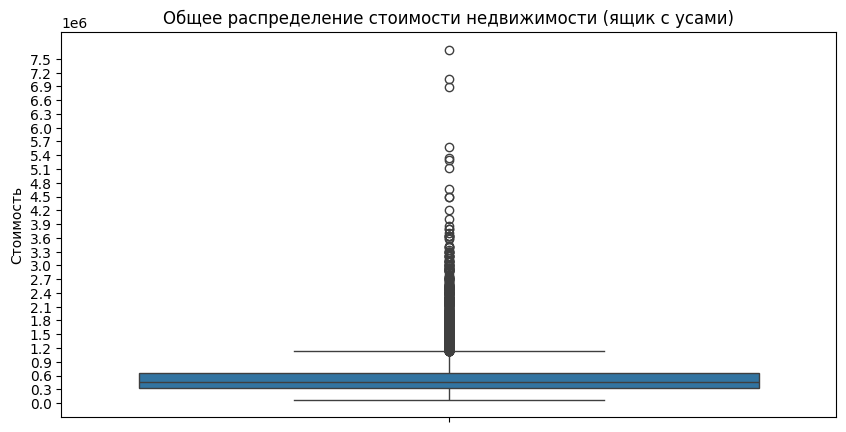

In [39]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['price'])
plt.title('Общее распределение стоимости недвижимости (ящик с усами)')
plt.ylabel('Стоимость')
plt.yticks(np.arange(0, df['price'].max(), 300_000))
;

Как видно из построенных графиков медианная стоимость дома составляет около 500 тыс. <br/>
Основная доля домов приходится на диапазон стоимости от 350 тысяч до 600 тысяч.<br/>
Присутствует существенная доля "выбросов" стоимости примерно от 1,2 млн.<br/>
Для выявления ключевых факторов их появления необходимо проведение более детального анализа.

3. Изучите распределение квадратуры жилой

''

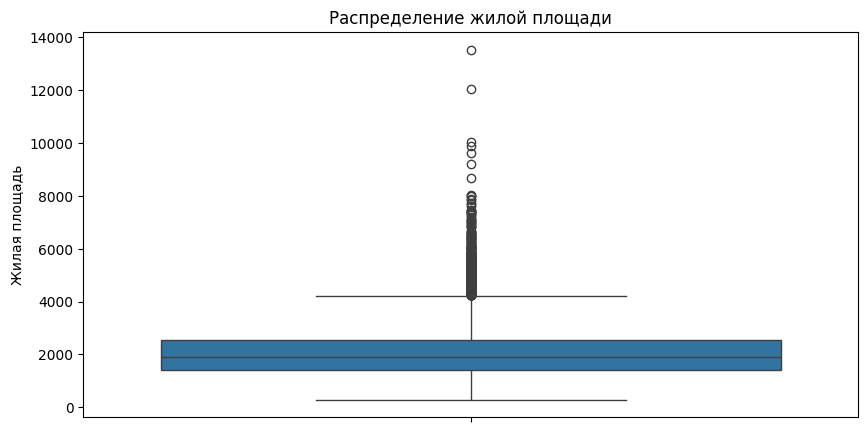

In [40]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['sqft_living'])
plt.title('Распределение жилой площади')
plt.ylabel('Жилая площадь')
;

Как видно из графика основное распределение жилой площади недвижимости приходится на дипазон 1700-2500.<br/>
Медианное значение составляет около 2000.<br/>
Элитная недвижимость представлена домами-"выбросами" в диапазоне жилой площади 4000-8000 и более.

4. Изучите распределение года постройки

''

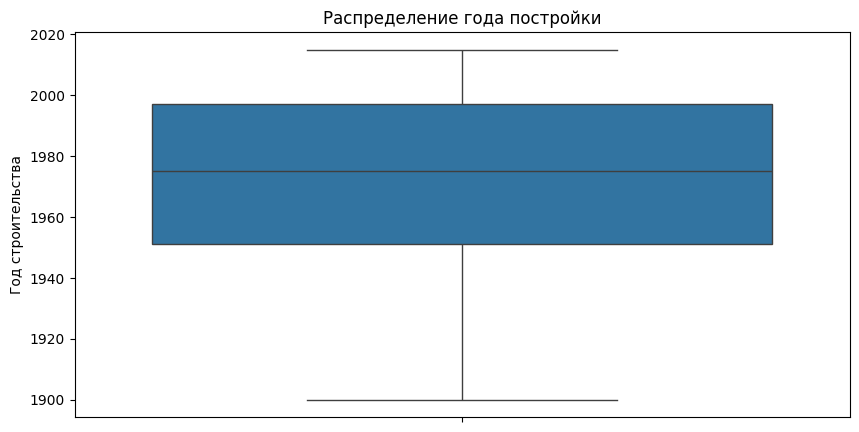

In [41]:
plt.figure(figsize=(10, 5))
sns.boxplot(df['yr_built'])
plt.title('Распределение года постройки')
plt.ylabel('Год строительства')
;

Как видно из представленного графика основная доля домов построена в период около 1950-2000 г.г.<br/>
Медианное значение составляет 1975г.<br/>
Вполне вероятно, что это связано с "ламповым" периодом экономического роста и, как следствие, бумом строительства.<br/>
После 2000г. строительство почти не осуществлялось.

## Задача 2
- Постройте график
- Сделайте выводы

1. Изучите распределение домов от наличия вида на набережную

Осуществим подсчет количества домов в зависимости от наличия вида на набережную:

In [42]:
data_waterfront = df['waterfront'].value_counts()
data_waterfront

waterfront
0    21450
1      163
Name: count, dtype: int64

Построим круговую диаграмму распределения:

''

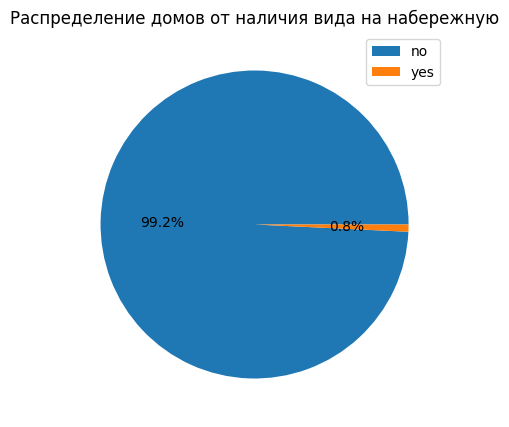

In [43]:
plt.figure(figsize=(10, 5))
plt.pie(data_waterfront, normalize='index', autopct='%1.1f%%')
plt.title('Распределение домов от наличия вида на набережную')
plt.legend(['no', 'yes'])
;

Как видно из представленного графика более 99% домов не имеют вида на набережную.<br/>
Также, вполне вероятно, что оставшиеся 0.8% домов с видом на набережную и есть те основные "выбросы" стоимости, рассмотренные в первой задаче.<br/>
Изучение зависимости стоимости домов от наличия вида на набережную будет представлено в решении задачи 3.

2. Изучите распределение этажей домов

In [44]:
data_floors = df['floors'].value_counts()
data_floors

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

''

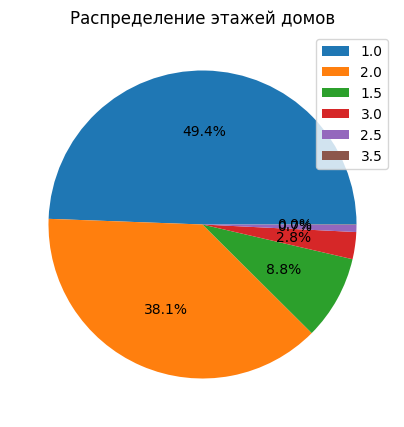

In [45]:
plt.figure(figsize=(12, 5))
plt.pie(data_floors, normalize='index', autopct='%1.1f%%')
plt.title('Распределение этажей домов')
plt.legend(data_floors.index)
;

На диаграмме видно, что чуть менее 50% всех домов составляет 1-этажная застройка.<br/>
На 2-х этажные дома приходится 38% всего распределения.

3. Изучите распределение состояния домов

In [46]:
data_condition = df['condition'].value_counts().reset_index()
data_condition

,condition,count
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


''

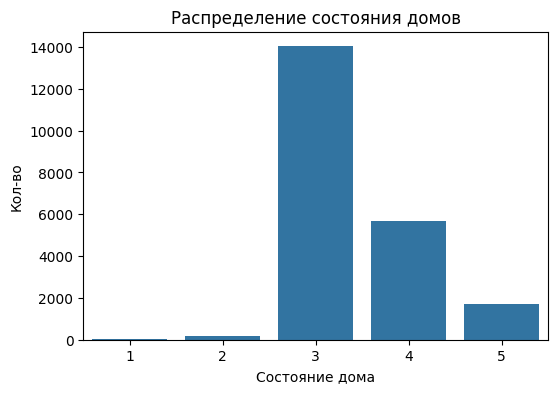

In [47]:
plt.figure(figsize=(6, 4))
sns.barplot(x=data_condition['condition'], y=data_condition['count'])
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Кол-во')
;

На графике видно, что основная доля домов приходится на состояния 3 и 4, вероятно, это "удовлетворительное" и "хорошее".<br/>
Дополнительно исследуем зависимость состояния дома от года постройки:

''

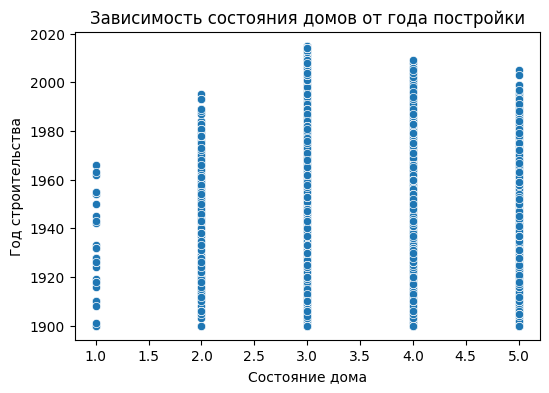

In [48]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['condition'], y=df['yr_built'])
plt.title('Зависимость состояния домов от года постройки')
plt.xlabel('Состояние дома')
plt.ylabel('Год строительства')
;

Из представленного графика можно сделать вывод, что состояние дома и год постройки не имеют прямой завимисти.<br/>
В плохом соостоянии могут быть как "старые", так и более "свежие" дома.

## Задача 3
- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

Для анализа взаимосвязей между характеристиками сформируем перечень колонок с числовыми значениями и построим матрицу корреляции:

In [49]:
cols_2_corr = ['price', 'bedrooms', 'bathrooms', 'condition', 'floors', 'grade', 'lat', 'long', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'view', 'waterfront', 'yr_built'] 
df_corr = df[cols_2_corr].corr().round(2)
df_corr

,price,bedrooms,bathrooms,condition,floors,grade,lat,long,sqft_above,sqft_basement,sqft_living,sqft_lot,view,waterfront,yr_built
price,1.00,0.31,0.53,0.04,0.26,0.67,0.31,0.02,0.61,0.32,0.70,0.09,0.40,0.27,0.05
bedrooms,0.31,1.00,0.52,0.03,0.18,0.36,-0.01,0.13,0.48,0.30,0.58,0.03,0.08,-0.01,0.15
bathrooms,0.53,0.52,1.00,-0.12,0.50,0.66,0.02,0.22,0.69,0.28,0.75,0.09,0.19,0.06,0.51
condition,0.04,0.03,-0.12,1.00,-0.26,-0.14,-0.01,-0.11,-0.16,0.17,-0.06,-0.01,0.05,0.02,-0.36
floors,0.26,0.18,0.50,-0.26,1.00,0.46,0.05,0.13,0.52,-0.25,0.35,-0.01,0.03,0.02,0.49
grade,0.67,0.36,0.66,-0.14,0.46,1.00,0.11,0.20,0.76,0.17,0.76,0.11,0.25,0.08,0.45
lat,0.31,-0.01,0.02,-0.01,0.05,0.11,1.00,-0.14,-0.00,0.11,0.05,-0.09,0.01,-0.01,-0.15
long,0.02,0.13,0.22,-0.11,0.13,0.20,-0.14,1.00,0.34,-0.14,0.24,0.23,-0.08,-0.04,0.41
sqft_above,0.61,0.48,0.69,-0.16,0.52,0.76,-0.00,0.34,1.00,-0.05,0.88,0.18,0.17,0.07,0.42
sqft_basement,0.32,0.30,0.28,0.17,-0.25,0.17,0.11,-0.14,-0.05,1.00,0.44,0.02,0.28,0.08,-0.13


Для более наглядного представления полученных данных построим "тепловую карту":

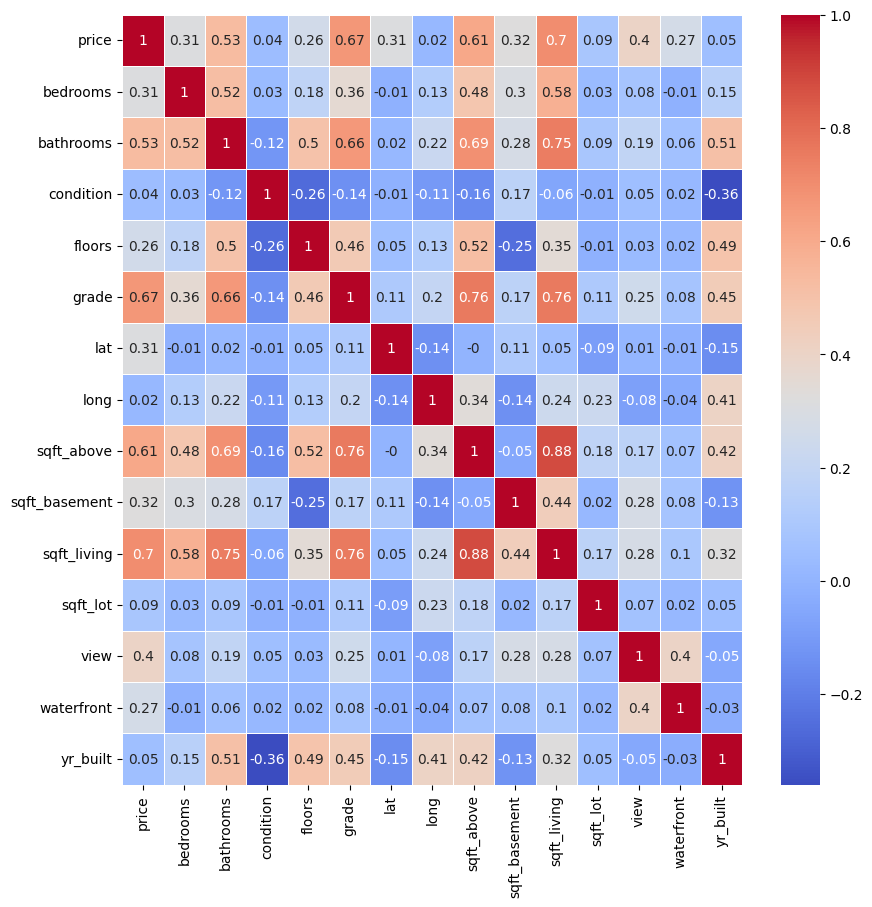

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap='coolwarm');

Из представленной диаграммы можно сделать следующие выводы:
- высокое влияние на стоимость недвижимости оказывает "жилая площадь" (0.7)
- заметное влияние на стоимость оказывают "кол-во ванных комнат (bathrooms)", "конструкция и дизайн (grade)", "площадь выше земли (sqft_above)" (0.5-0.7)
- умеренное влияние на стоимость у характеристик "кол-во спальных (bedrooms)", "широта (lat)", "подземная площадь (sqft_basement)", "вид (view)"
- как ни странно, но "кол-во этажей (floors)", и "вид на набережную (waterfront)" оказывают слабое влияние на стоимость недвижимости.

Рассмотрим с помощью диаграмм более детальное влияние на стоимость недвижимости следующих характеристик:
- "кол-во ванных комнат (bathrooms)"
- "конструкция и дизайн (grade)"
- "площадь выше земли (sqft_above)"

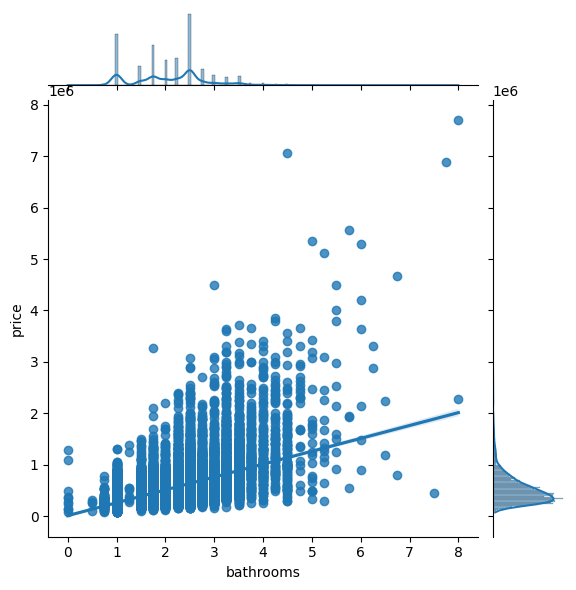

In [51]:
sns.jointplot(data=df, x='bathrooms', y='price', kind='reg');

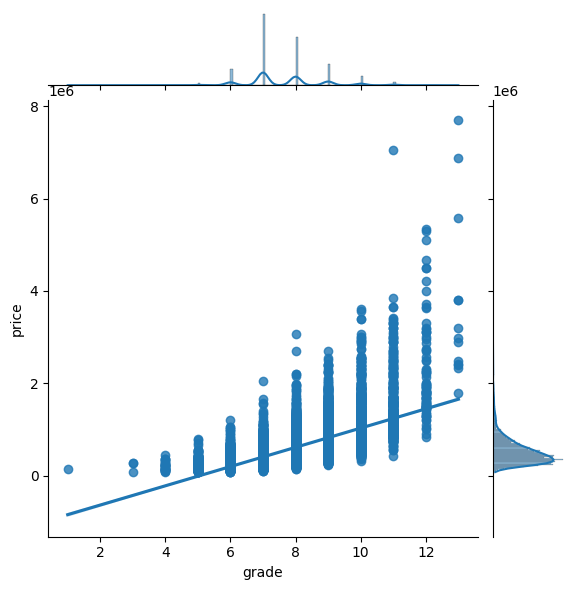

In [52]:
sns.jointplot(data=df, x='grade', y='price', kind='reg');

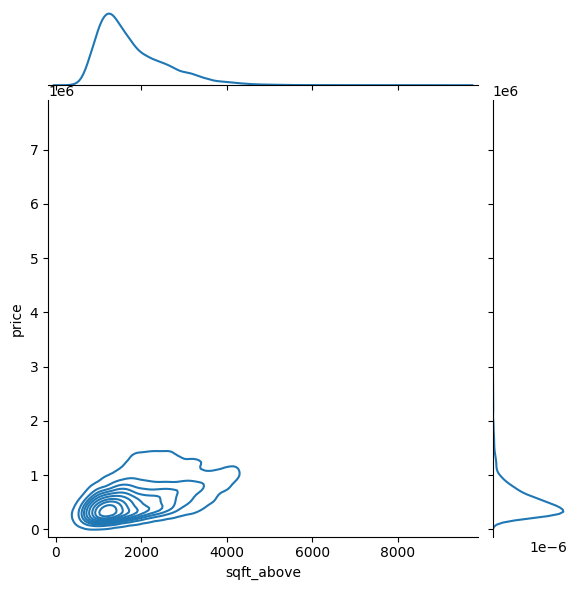

In [53]:
sns.jointplot(data=df, x='sqft_above', y='price', kind='kde');

Как уже было отмечено ранее, указанные характеристики оказывают заметное влияние на стоимость недвижимости в данном регионе.

Рассмотрим влияние характеристики "жилая площадь" на стоимость недвижимости:

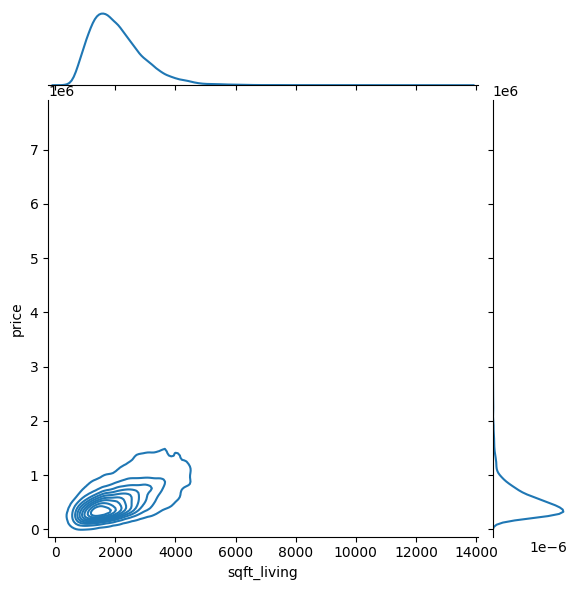

In [54]:
sns.jointplot(data=df, x='sqft_living', y='price', kind='kde');

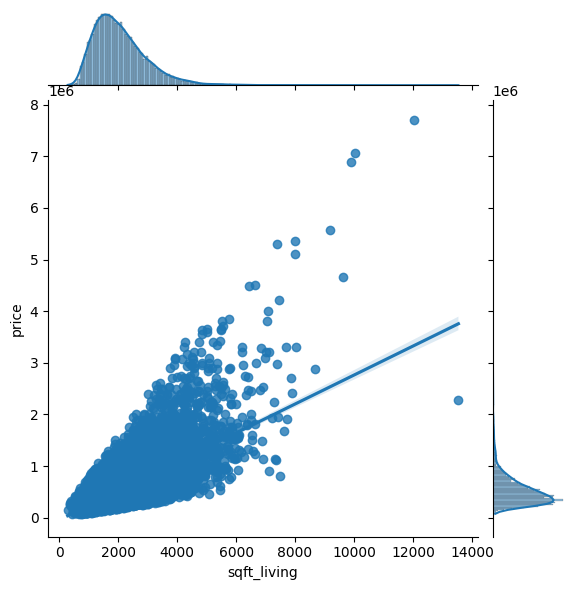

In [55]:
sns.jointplot(data=df, x='sqft_living', y='price', kind='reg');

На графиках также видно, что размер жилой площади оказывает высокое влияние на стоимость недвижимости, что вполне логично.

Характеристика "вид (view)" оказывает умеренное влияние на стоимость, построим диаграмму данной зависимости:

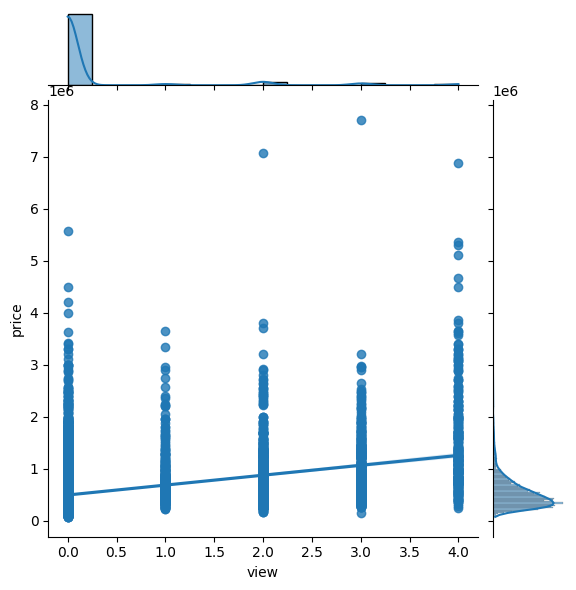

In [56]:
sns.jointplot(data=df, x='view', y='price', kind='reg');

Наконец, рассмотрим один из слабых факторов влияния на стоимость недвижимости - "вид на набережную (waterfront)":

''

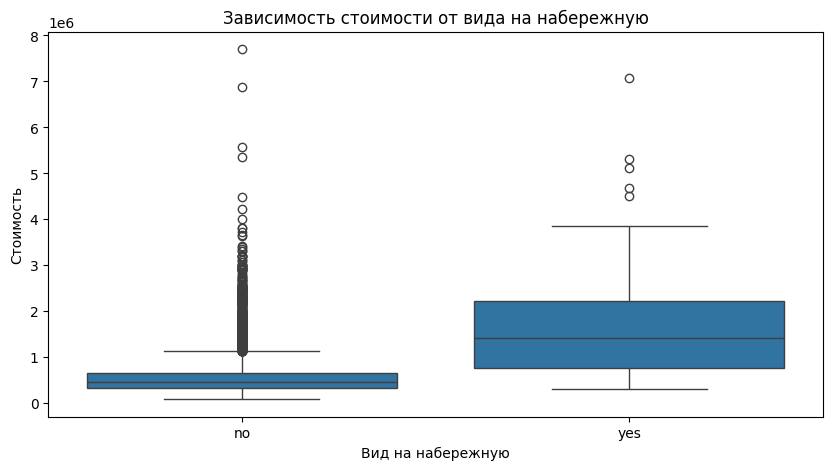

In [57]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='waterfront', y='price')
plt.title('Зависимость стоимости от вида на набережную')
plt.ylabel('Стоимость')
plt.xlabel('Вид на набережную')
plt.xticks([0, 1], ['no', 'yes'])
;

Диаграмма "ящик с усами" как нельзя лучше подтверждает, что наличие вида на набережную не является существенным фактором, оказывающим влияние на стоимость недвижимости.<br/>
Например, недвижимость с максимальной стоимостью вида на набережную не имеет.

Таким образом, мы провели исследование основных вещественных и категориальных характеристик недвижимости, а также выявили ключевые факторы влияния на её стоимость.